# データ初期化作業
データの読み込みを行う。

| Index | Param | Description |
|---|---|---|
| 0 | Case Index |  |
| 1 | Gender |  |
| 2 | Age |  |
| 3 | Height |  |
| 4 | Weight |  |
| 5 | MaxBP |  |
| 6 | MinBP |  |
| 7 | BTResult | 1.Normal 2.Needs Observation 3.Needs Advice 4.Doctor Consultation required |
| 8 | HTResult | 1.Normal 2.Needs Observation 3.Needs Advice 4.Doctor Consultation required |
| 9 | BMI | Weight/(Height)^2 |

In [58]:
import numpy as np
import csv
import pprint

data = []
with open("data_original.csv", "r") as f:
    reader = csv.reader(f)
    for row in reader:
        d = [int(row[0])]
        if row[1] == '男':
            d.append(0)
        else:
            d.append(1)
        for p in row[2:]:
            d.append(int(p))
        d.append(d[4] / pow(d[3], 2) * pow(10, 4))
        data.append(d)
pprint.pprint(data[:5])
npData = np.array(data)


[[1, 0, 53, 167, 75, 144, 80, 4, 4, 26.89232313815483],
 [2, 1, 55, 153, 64, 143, 110, 4, 3, 27.33991199965825],
 [3, 0, 43, 168, 68, 119, 90, 2, 2, 24.09297052154195],
 [4, 0, 28, 175, 72, 115, 82, 1, 1, 23.510204081632654],
 [5, 1, 29, 160, 48, 120, 80, 1, 1, 18.75]]


In [59]:
from statistics import mean, median, variance, stdev

print(len(data))
print(data[2])


50
[3, 0, 43, 168, 68, 119, 90, 2, 2, 24.09297052154195]


# 方針
## 作成する散布図
- BPResultとBMIの関係
- MaxBP, MinBP, BTResultの関係→平均を求める?

[Text(0.5, 1.0, 'Relation Scatter Plot between HTResult and BMI')]

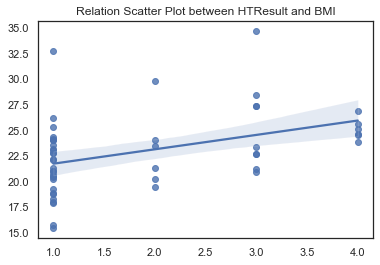

In [60]:
import seaborn as sns

# use the function regplot to make a scatterplot
p = sns.regplot(x=npData[:, 8], y=npData[:, 9])
p.set(title="Relation Scatter Plot between HTResult and BMI")

[112.  126.5 104.5  98.5 100.  117.5  97.5  95.  111.   99.  101.5 103.
 121.  109.  109.5 100.  103.5  99.5  91.5  85.  101.   99.   97.   96.5
 101.5 102.5 102.   99.  111.  104.5 102.  104.  105.  122.  116.  117.5
 116.  136.  115.  116.5 109.  102.5  95.   95.  105.  133.5 133.5 108.
 106.5 120.5]


[Text(0.5, 1.0, 'Relation Scatter Plot between BTResult and average of BP')]

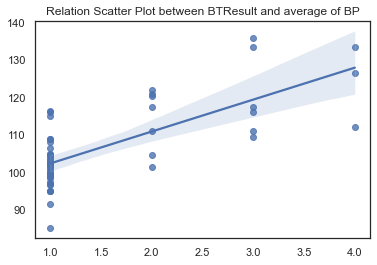

In [61]:
print((npData[:, 5] + npData[:, 6]) / 2)
p = sns.regplot(y=((npData[:, 5] + npData[:, 6]) / 2), x=(npData[:, 7]))
p.set(title="Relation Scatter Plot between BTResult and average of BP")

[Text(0.5, 1.0, 'Relation Scatter Plot between BTResult and deviation of max and min BP')]

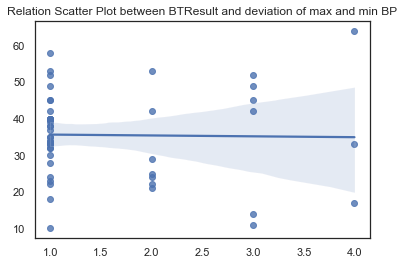

In [62]:
p = sns.regplot(x=npData[:, 7], y=npData[:, 5] - npData[:, 6])
p.set(title="Relation Scatter Plot between BTResult and deviation of max and min BP")

[Text(0.5, 1.0, 'Relation Scatter Plot between MaxBP and BTResult')]

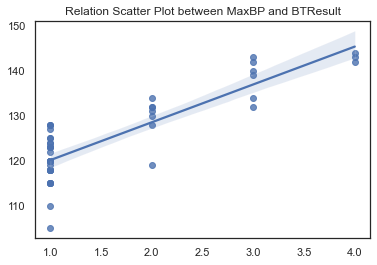

In [63]:
p = sns.regplot(x=npData[:, 7], y=npData[:, 5])
p.set(title="Relation Scatter Plot between MaxBP and BTResult")

[Text(0.5, 1.0, 'Relation Scatter Plot between MinBP and BTResult')]

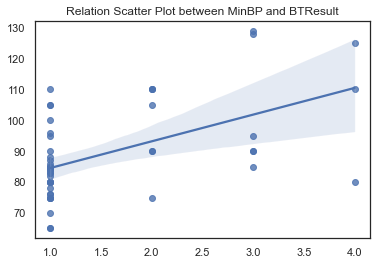

In [64]:
p = sns.regplot(x=npData[:, 7], y=npData[:, 6])
p.set(title="Relation Scatter Plot between MinBP and BTResult")

[Text(0.5, 1.0, 'Relation Scatter Plot between MaxBP and HTResult')]

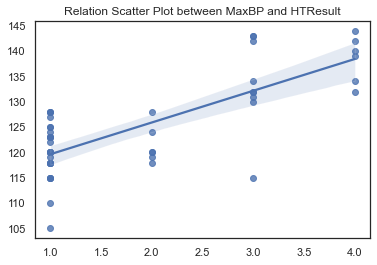

In [65]:
p = sns.regplot(x=npData[:, 8], y=npData[:, 5])
p.set(title="Relation Scatter Plot between MaxBP and HTResult")

[Text(0.5, 1.0, 'Relation Scatter Plot between MinBP and HTResult')]

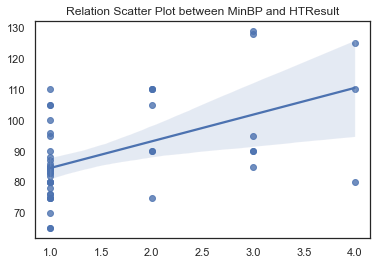

In [66]:
p = sns.regplot(x=npData[:, 7], y=npData[:, 6])
p.set(title="Relation Scatter Plot between MinBP and HTResult")

[Text(0.5, 1.0, 'Relation Scatter Plot between Age and HTResult')]

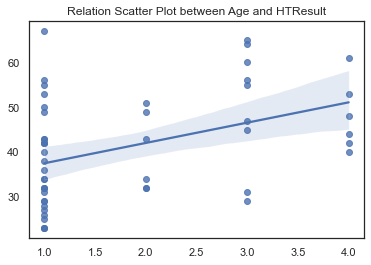

In [67]:
p = sns.regplot(x=npData[:, 8], y=npData[:, 2])
p.set(title="Relation Scatter Plot between Age and HTResult")

In [ ]:
p = sns.regplot(x=npData[:, 7], y=npData[:, 2])
p.set(title="Relation Scatter Plot between Age and BTResult")

[Text(0.5, 1.0, 'Relation Scatter Plot between gender and height')]

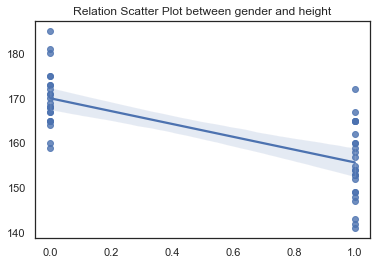

In [73]:
p = sns.regplot(x=npData[:, 1], y=npData[:, 3])
p.set(title="Relation Scatter Plot between gender and height")

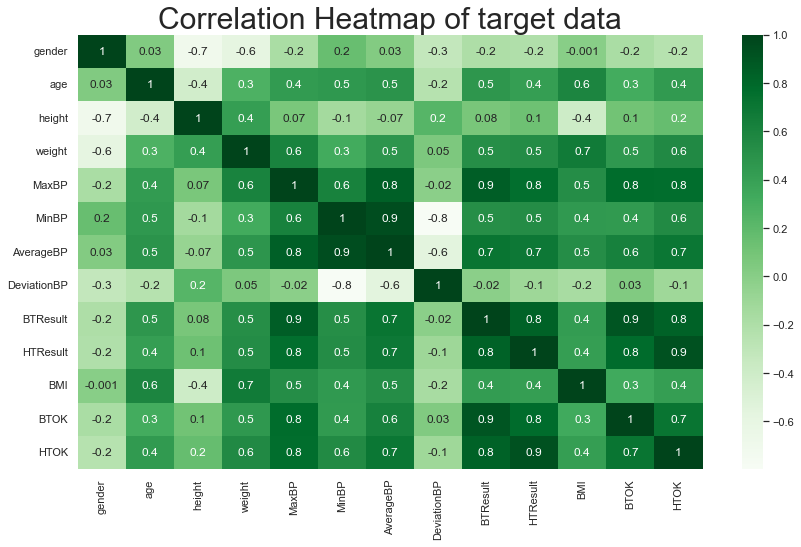

In [93]:
import pandas as pd

with open("data_generated.csv", "w") as f:
    f.write("gender,age,height,weight,MaxBP,MinBP,AverageBP,DeviationBP,BTResult,HTResult,BMI,BTOK,HTOK\n")
    for d in data:
        f.write(str(d[1:7])[1:len(str(d[1:7])) - 1])
        f.write(",")
        f.write(str((d[5] + d[6]) / 2))
        f.write(",")
        f.write(str((d[5] - d[6])))
        f.write(",")
        f.write(str(d[7:])[1:len(str(d[7:])) - 1])
        f.write(",")
        f.write("0" if d[7] < 3 else "1")
        f.write(",")
        f.write("0" if d[8] < 3 else "1")
        f.write("\n")

with open("data_generated.csv", "r") as f:
    df = pd.read_csv(f)
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Greens", fmt='.1g')
heatmap.set(title="Correlation Heatmap of target data")
heatmap.title.set_size(30)